## On teste les Convolutional layers (plus adaptées aux images)

In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

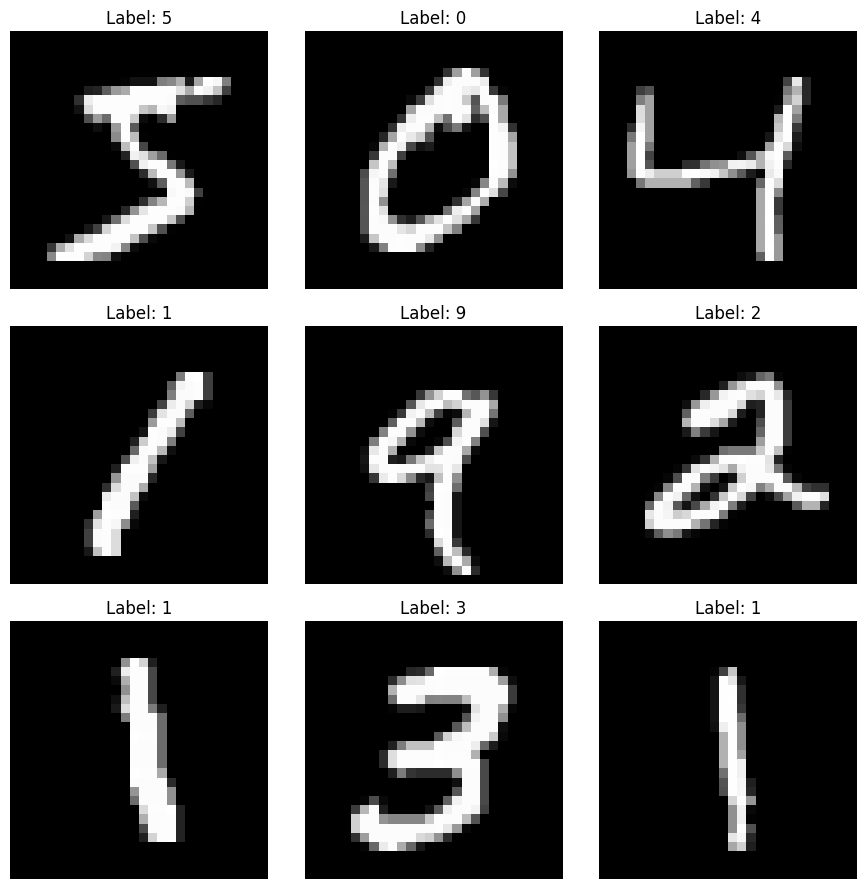

In [18]:
plt.figure(figsize=(9, 9))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(train_images[i].reshape(28, 28), cmap='gray')
    plt.title(f'Label: {np.argmax(train_labels[i])}')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [4]:
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

In [5]:
from keras.layers import Conv2D, Flatten, MaxPooling2D

In [6]:
model = Sequential()

model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())

In [7]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

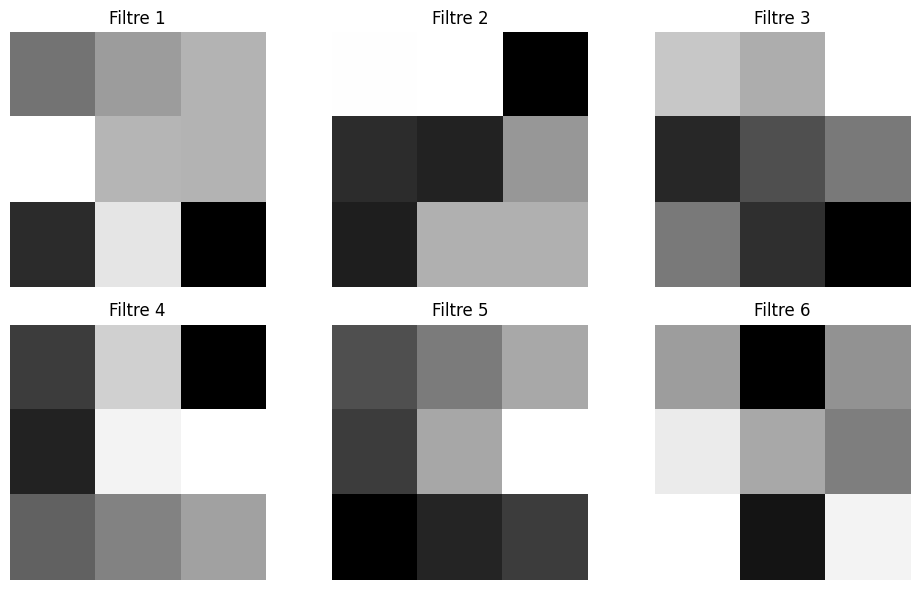

In [19]:
filters, biases = model.layers[0].get_weights()
n_filters = filters.shape[3]

# Afficher les 6 premiers filtres
plt.figure(figsize=(10, 6))
for i in range(6):
    f = filters[:, :, :, i]
    plt.subplot(2, 3, i+1)
    plt.imshow(f[:, :, 0], cmap='gray')
    plt.title(f'Filtre {i+1}')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [8]:
model.add(Dense(10, activation='softmax'))  # Output 

In [12]:
hist = model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0562 - accuracy: 0.9827 - val_loss: 0.0595 - val_accuracy: 0.9824
Epoch 2/3
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0495 - accuracy: 0.9848 - val_loss: 0.0620 - val_accuracy: 0.9820
Epoch 3/3
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0438 - accuracy: 0.9868 - val_loss: 0.0647 - val_accuracy: 0.9824


In [10]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 3s 10ms/step - loss: 0.0866 - accuracy: 0.9739
Test accuracy: 0.9739000201225281


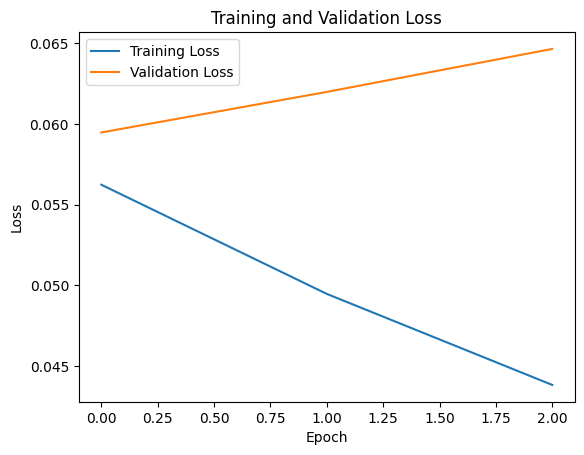

In [16]:



plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()



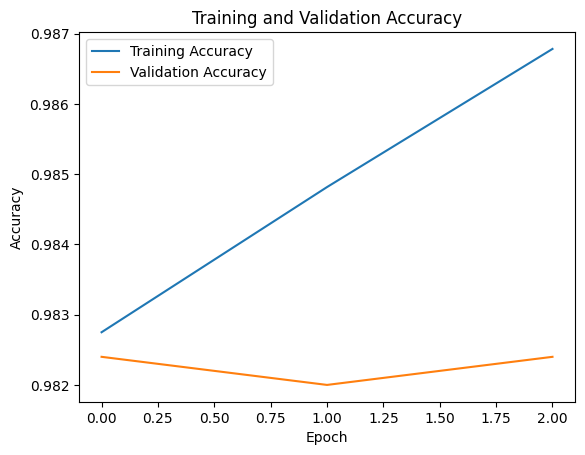

In [17]:
plt.plot(hist.history['accuracy'], label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

313/313 [==============================] - 3s 9ms/step


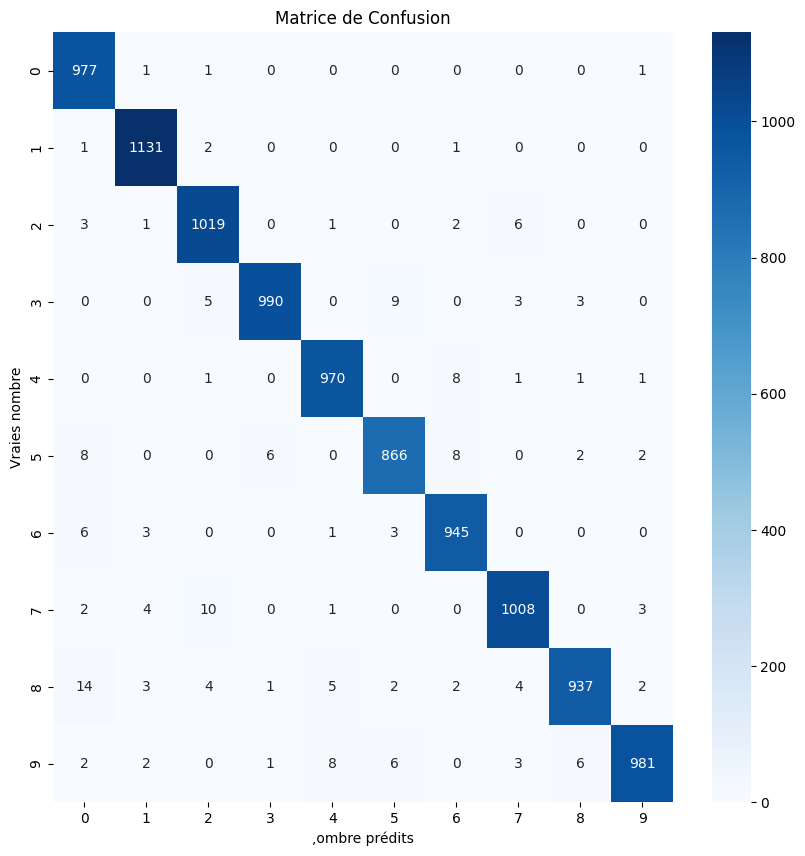

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

preds = model.predict(test_images)
preds_classes = np.argmax(preds, axis=1)
true_classes = np.argmax(test_labels, axis=1)

cm = confusion_matrix(true_classes, preds_classes)

plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de Confusion')
plt.ylabel('Vraies nombre')
plt.xlabel(',ombre prédits')
plt.show()
